## **Importing Required Libraries**

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [62]:
df = pd.read_csv(r"E:\Internship Projects\Personal Loan Acceptance Classifier\bank+marketing\bank\bank-full.csv",sep = ";")

In [63]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [64]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15506,31,admin.,married,secondary,no,212,yes,no,cellular,18,jul,191,3,-1,0,unknown,no
3099,43,blue-collar,married,secondary,no,15740,yes,no,unknown,14,may,252,2,-1,0,unknown,no
3267,44,blue-collar,single,primary,no,116,yes,no,unknown,15,may,160,1,-1,0,unknown,no
13326,44,blue-collar,married,primary,no,1139,no,yes,cellular,8,jul,155,2,-1,0,unknown,no
29748,40,services,married,secondary,no,1674,yes,yes,cellular,4,feb,144,1,274,2,other,no


In [65]:
df.shape

(45211, 17)

In [66]:
# checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [67]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **The Data Set is Clearly Imbalanced**

In [68]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

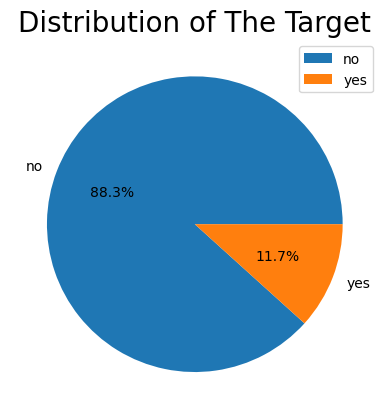

In [69]:
plt.pie(df["y"].value_counts(),labels = df["y"].value_counts().index,autopct = "%1.1f%%")
plt.title("Distribution of The Target",fontsize = 20)
plt.legend()
plt.show()

## **Most of the target People Fall in age from 30 to 56**

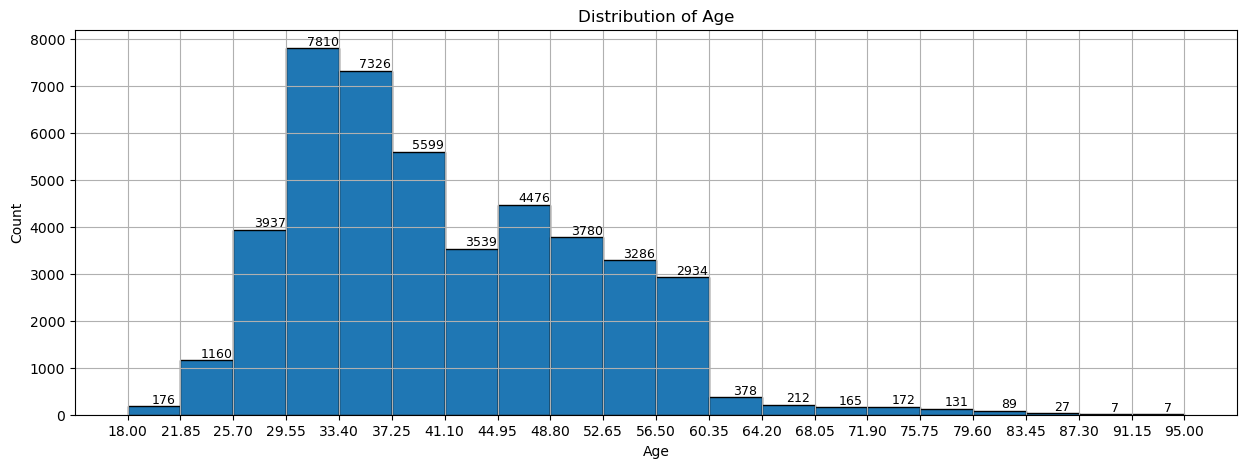

In [71]:
plt.figure(figsize = (15,5))
counts, bin_edges, _ = plt.hist(df["age"], bins=20, edgecolor='black')
for count, x in zip(counts, bin_edges):
    plt.text(x + 2.65, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xticks(bin_edges)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()

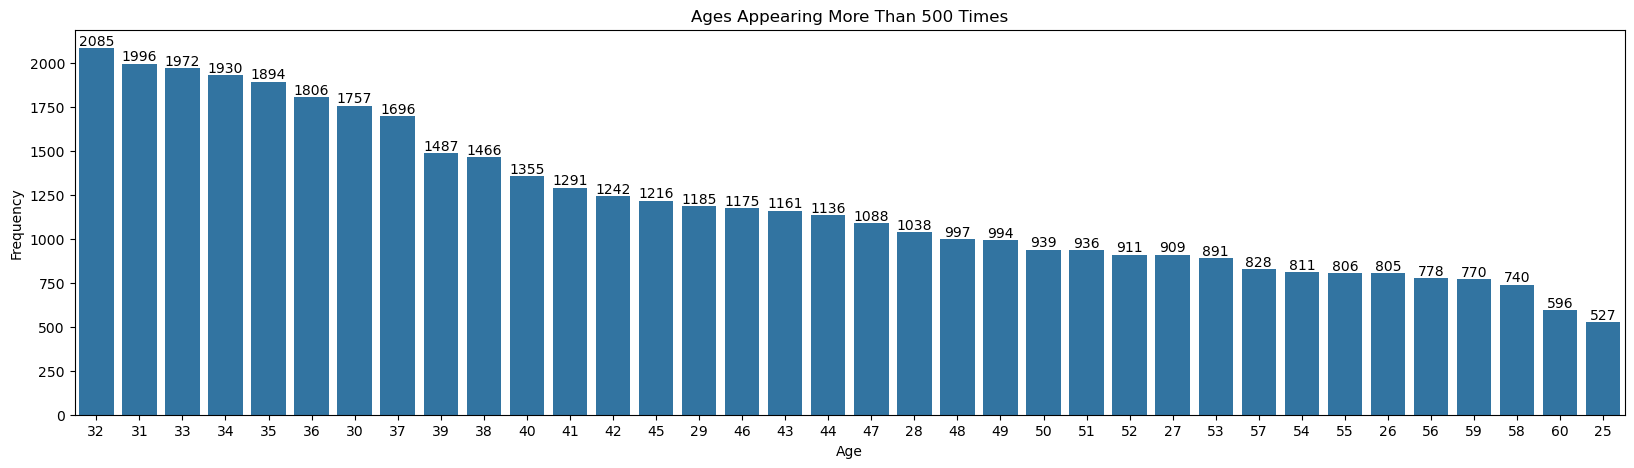

In [72]:
age_counts = df["age"].value_counts()
age_filtered = age_counts[age_counts > 500]

age_df = age_filtered.reset_index()
age_df.columns = ['age', 'count']
age_df = age_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(20, 5))
ax = sns.barplot(x='age', y='count', data=age_df, order=age_df['age'])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Ages Appearing More Than 500 Times")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## **The graph is positively Skewed (right skewed) means tail is in right side**

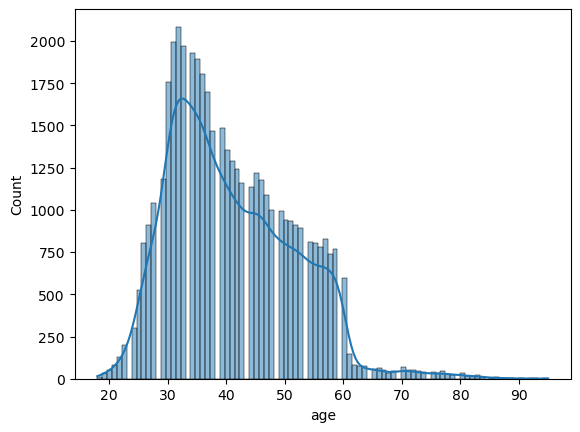

In [12]:
sns.histplot(x = df["age"],kde = True)
plt.show()

## **The age box plot show overlap in Distribution of Target seem less important as their is very small difference in Age Median and more overlap in Boxplots**

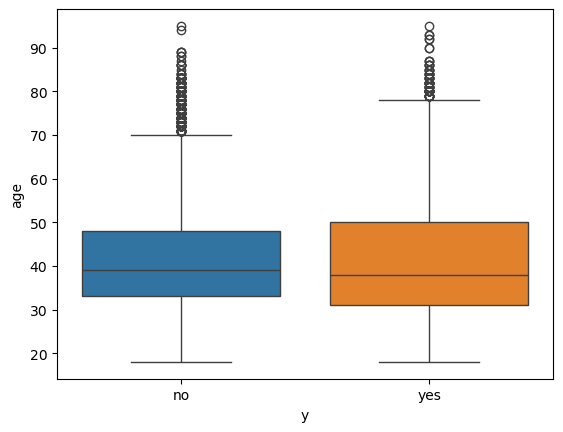

In [13]:
sns.boxplot(y = df["age"],hue = df["y"],x = df["y"])
plt.show()

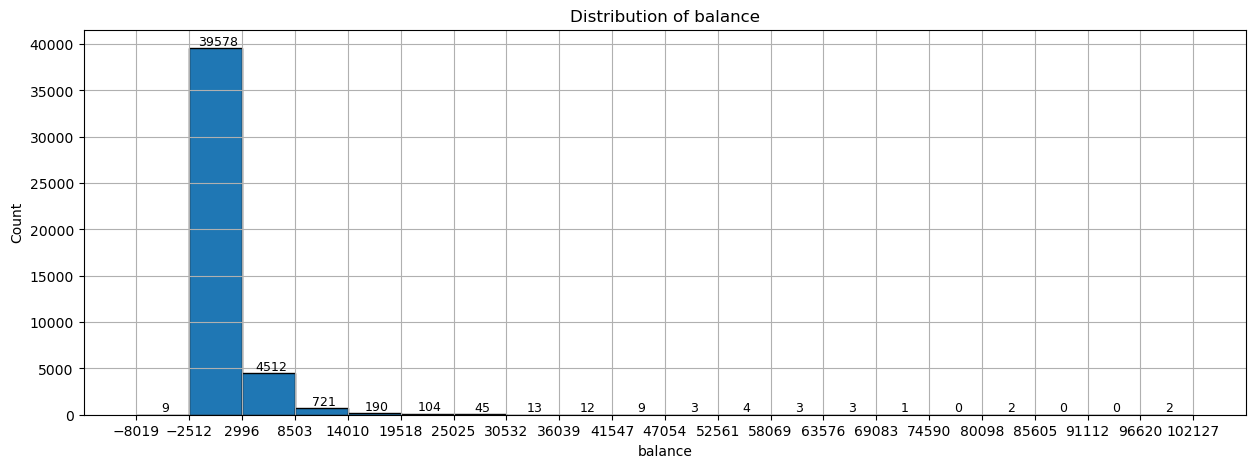

In [14]:
plt.figure(figsize = (15,5))
counts, bin_edges, _ = plt.hist(df["balance"], bins=20, edgecolor='black')
for count, x in zip(counts, bin_edges):
    plt.text(x + 3000, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xticks(bin_edges)
plt.xlabel("balance")
plt.ylabel("Count")
plt.title("Distribution of balance")
plt.grid(True)
plt.show()

## **There are many outliers in balance feature**

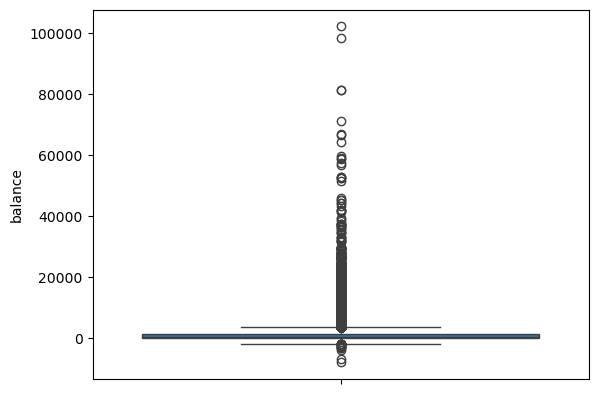

In [15]:
sns.boxplot(y = df["balance"])
plt.show()

In [16]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

## **Removig upper and lower extremes in balanace feature**

In [17]:
q_low = df['balance'].quantile(0.01)
q_high = df['balance'].quantile(0.99)

df = df[(df['balance'] >= q_low) & (df['balance'] <= q_high)]

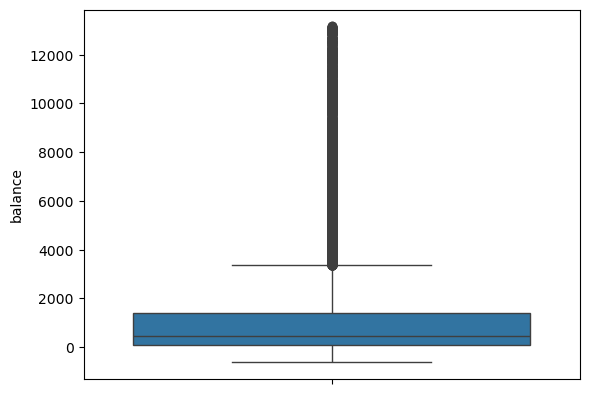

In [18]:
sns.boxplot(y = df["balance"])
plt.show()

In [19]:
df.shape

(44308, 17)

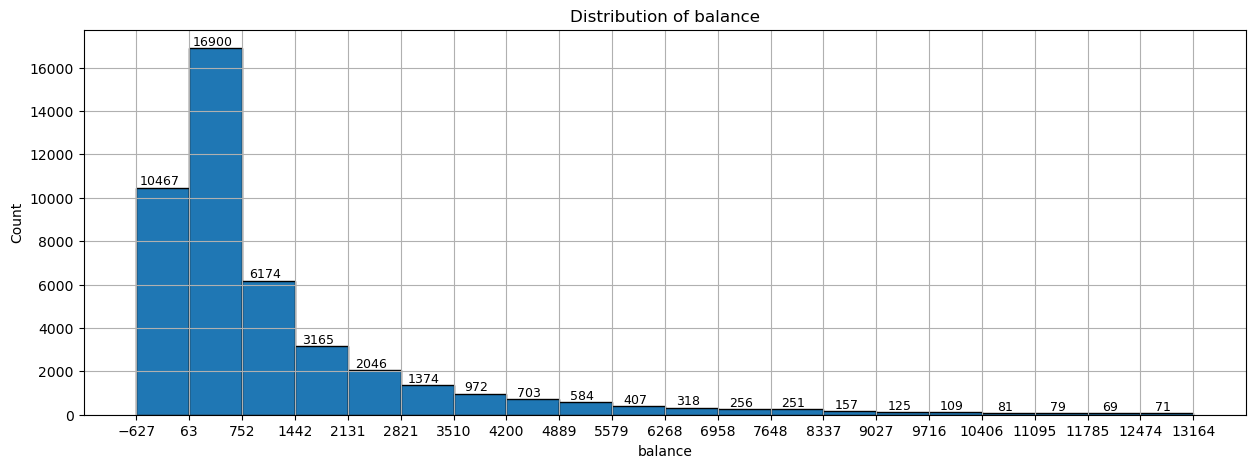

In [20]:
plt.figure(figsize = (15,5))
counts, bin_edges, _ = plt.hist(df["balance"], bins=20, edgecolor='black')
for count, x in zip(counts, bin_edges):
    plt.text(x + 300, count, str(int(count)), ha='center', va='bottom', fontsize=9)
plt.xticks(bin_edges)
plt.xlabel("balance")
plt.ylabel("Count")
plt.title("Distribution of balance")
plt.grid(True)
plt.show()

## **The balance box plot show overlap in Distribution of Target seem less important**

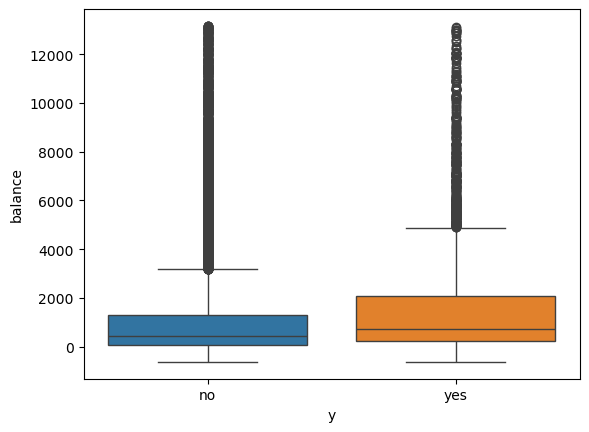

In [21]:
sns.boxplot(y = df["balance"],hue = df["y"],x = df["y"])
plt.show()

## **The campaign box plot show overlap in Distribution of Target alone it seem less important but we will test in model by including it and not including it**

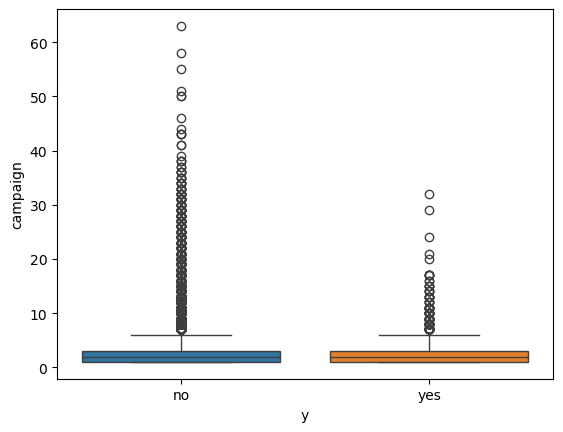

In [22]:
sns.boxplot(y = df["campaign"],hue = df["y"],x = df["y"])
plt.show()

## **Most of People are Married**

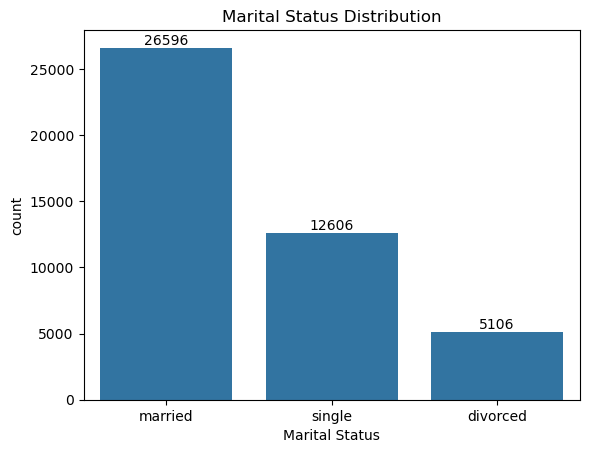

In [25]:
ax = sns.countplot(x = df["marital"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.show()

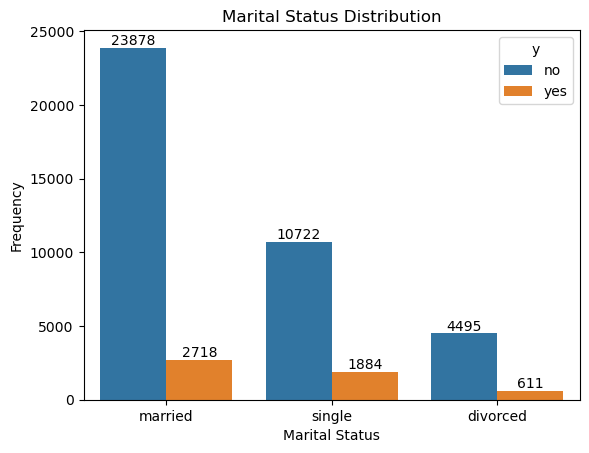

In [26]:
ax = sns.countplot(x = df["marital"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

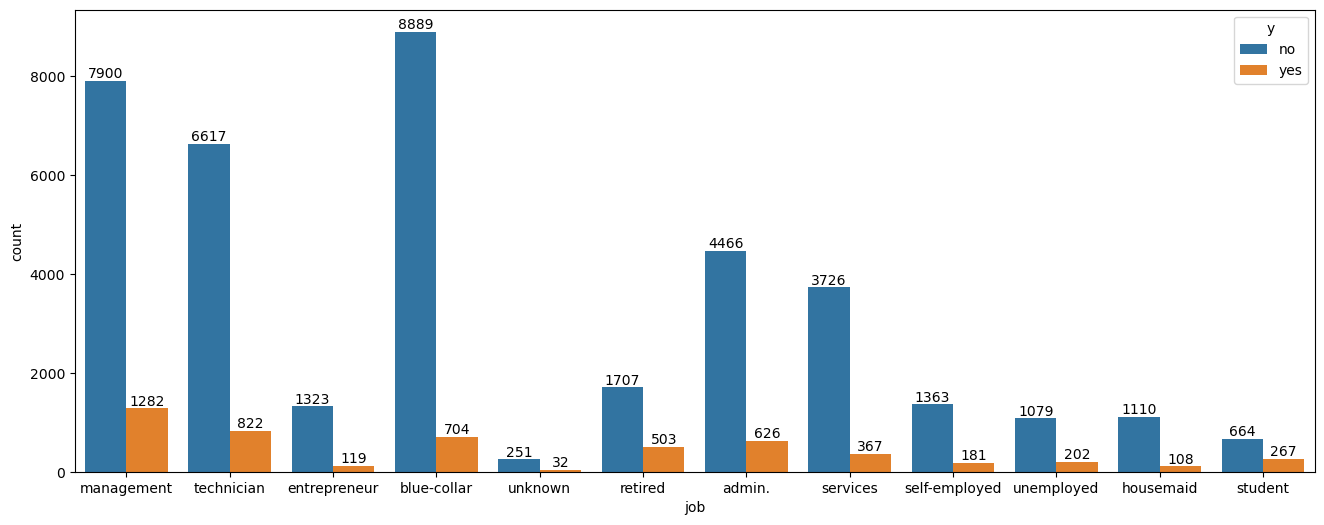

In [27]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df["job"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [28]:
df.groupby('housing').size().reset_index(name='count')

,housing,count
0,no,19727
1,yes,24581


In [29]:
df["housing"].value_counts(normalize = True)

housing
yes    0.554776
no     0.445224
Name: proportion, dtype: float64

In [30]:
(df.groupby('housing')['y'].value_counts(normalize=True) * 100).reset_index()

,housing,y,proportion
0,no,no,83.195620
1,no,yes,16.804380
2,yes,no,92.278589
3,yes,yes,7.721411


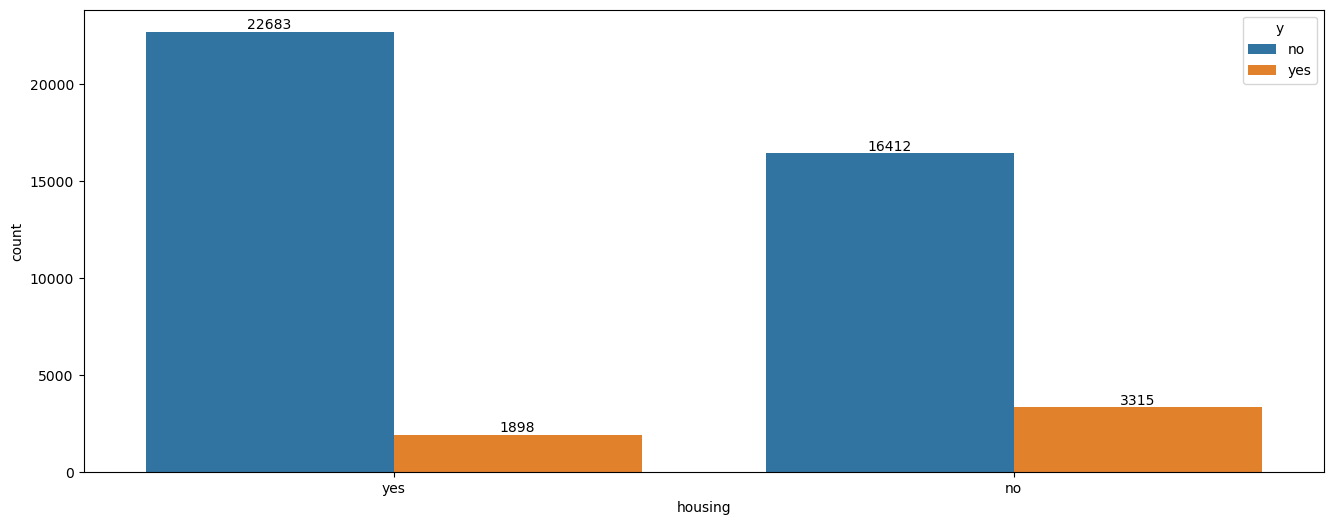

In [31]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df["housing"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

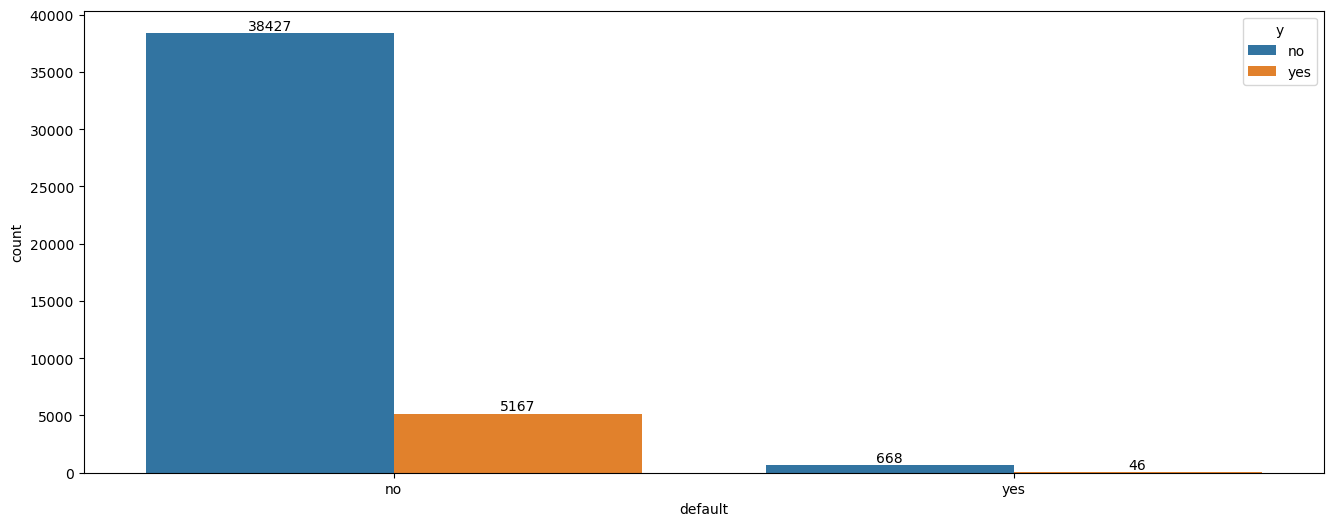

In [32]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df["default"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [33]:
(df.groupby("education")["y"].value_counts(normalize = True) * 100).reset_index()

,education,y,proportion
0,primary,no,91.351271
1,primary,yes,8.648729
2,secondary,no,89.383171
3,secondary,yes,10.616829
4,tertiary,no,84.830200
5,tertiary,yes,15.169800
6,unknown,no,86.450905
7,unknown,yes,13.549095


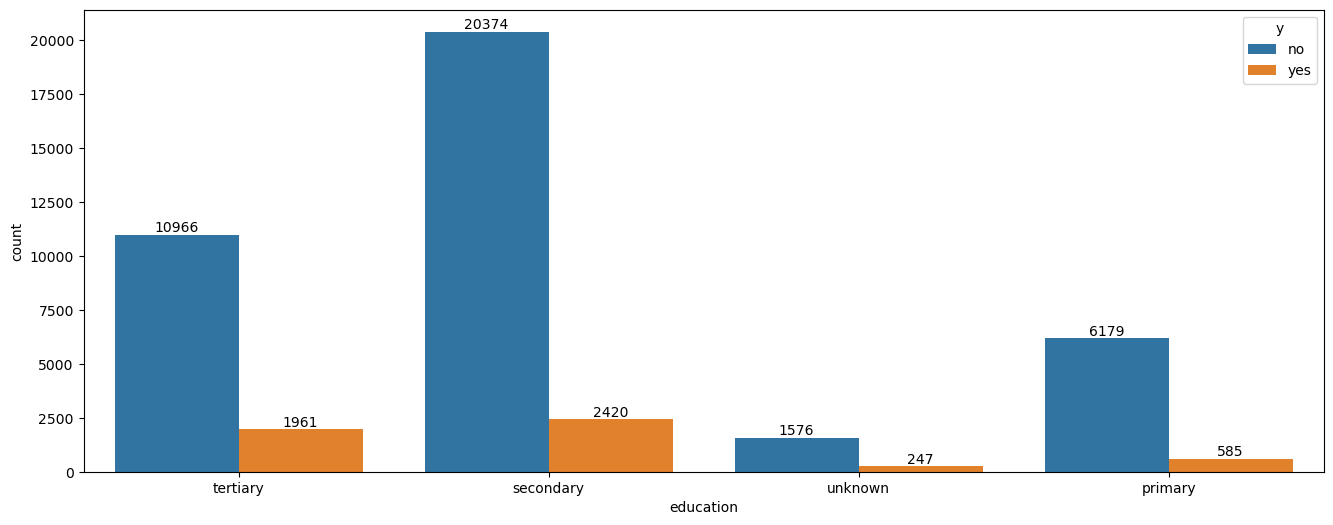

In [34]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = df["education"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [35]:
(df.groupby("poutcome")["y"].value_counts(normalize = True) * 100).reset_index()

,poutcome,y,proportion
0,failure,no,87.267081
1,failure,yes,12.732919
2,other,no,83.324130
3,other,yes,16.675870
4,success,yes,64.816054
5,success,no,35.183946
6,unknown,no,90.802278
7,unknown,yes,9.197722


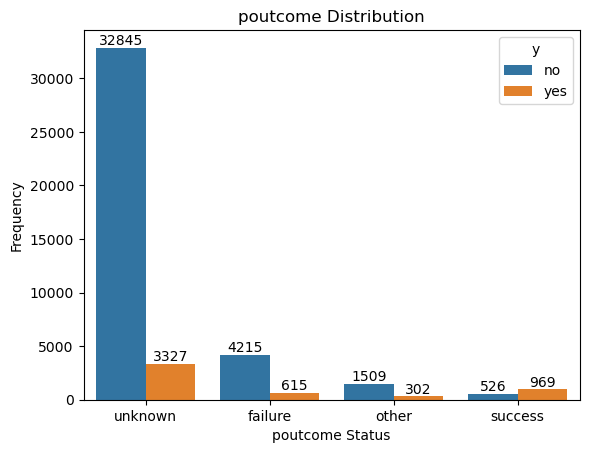

In [36]:
ax = sns.countplot(x = df["poutcome"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("poutcome Distribution")
plt.xlabel("poutcome Status")
plt.ylabel("Frequency")
plt.show()

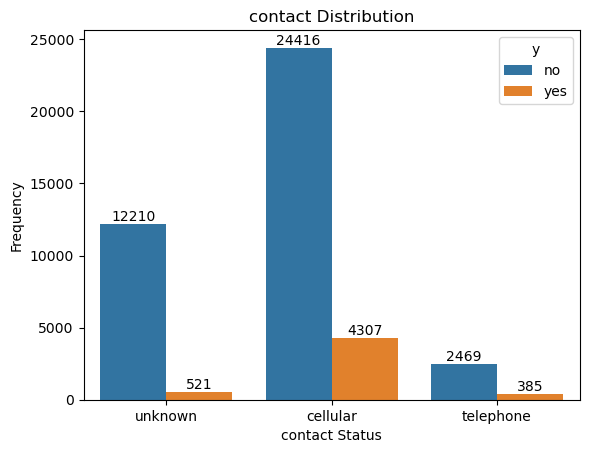

In [37]:
ax = sns.countplot(x = df["contact"],hue = df["y"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("contact Distribution")
plt.xlabel("contact Status")
plt.ylabel("Frequency")
plt.show()

In [38]:
features_to_use = [
    'age', 'job', 'marital', 'education', 'default', 'balance',
    'housing', 'loan', 'contact',
    'campaign','pdays', 'previous', 'poutcome','y'
]

In [39]:
df = df[features_to_use]

In [40]:
df["y"] = df["y"].replace({"yes":1,"no":0})

In [41]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
30941,42,services,divorced,primary,no,0,yes,no,cellular,2,-1,0,unknown,0
42855,34,technician,married,secondary,no,0,yes,no,cellular,1,91,2,other,0
40747,30,student,single,secondary,no,2046,no,no,telephone,1,-1,0,unknown,0
6385,34,technician,single,secondary,no,-329,yes,no,unknown,1,-1,0,unknown,0
33758,52,admin.,married,secondary,no,0,no,no,cellular,2,275,1,failure,0


In [42]:
df1 = pd.get_dummies(df, columns=['job', 'marital', 'education','default','housing','loan','contact','poutcome'])

In [43]:
df1.head()

,age,balance,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,-1,0,0,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
1,44,29,1,-1,0,0,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
2,33,2,1,-1,0,0,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True
3,47,1506,1,-1,0,0,False,True,False,False,...,True,True,False,False,False,True,False,False,False,True
4,33,1,1,-1,0,0,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


In [44]:
print(df1.columns)
print(len(df1.columns))

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')
38


In [45]:
df = df1

In [46]:
df = df.astype("int")

In [60]:
df[["y","contact_unknown"]].corr()

,y,contact_unknown
y,1.000000,-0.151213
contact_unknown,-0.151213,1.000000


## **Model Building**

In [101]:
x = df.drop("y",axis = 1)
y = df["y"]

## **Using SMOTE to balance the data**

In [105]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify = y
)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(x_train, y_train)

print("After SMOTE:", Counter(y_resampled))

After SMOTE: Counter({0: 39095, 1: 39095})


In [ ]:
x_train = X_resampled
y_train = y_resampled

In [107]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [110]:
y_train.value_counts(normalize = True)

y
0    0.5
1    0.5
Name: proportion, dtype: float64

In [111]:
y_test.value_counts(normalize = True)

y
0    0.5
1    0.5
Name: proportion, dtype: float64

In [119]:
lr = LogisticRegression(max_iter = 1000,penalty = "l2")
knn = KNeighborsClassifier(n_neighbors = 4)
dt = DecisionTreeClassifier()

In [120]:
lr.fit(x_train,y_train)
yhat1 = lr.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.9311932472183143
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7819
           1       0.98      0.88      0.93      7819

    accuracy                           0.93     15638
   macro avg       0.94      0.93      0.93     15638
weighted avg       0.94      0.93      0.93     15638



In [121]:
knn.fit(x_train,y_train)
yhat1 = knn.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.9278040670162425
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7819
           1       0.97      0.88      0.92      7819

    accuracy                           0.93     15638
   macro avg       0.93      0.93      0.93     15638
weighted avg       0.93      0.93      0.93     15638



In [122]:
dt.fit(x_train,y_train)
yhat1 = dt.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.8819542140938739
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7819
           1       0.87      0.89      0.88      7819

    accuracy                           0.88     15638
   macro avg       0.88      0.88      0.88     15638
weighted avg       0.88      0.88      0.88     15638



In [123]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb  = XGBClassifier(n_estimators=50,random_state=2)

In [124]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGBC':xgb
}

In [127]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return accuracy,cr,cm

In [128]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,cm11 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print(current_precision)
    print(cm11)

For  SVC
Accuracy -  0.707059726307712
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      7819
           1       0.71      0.70      0.70      7819

    accuracy                           0.71     15638
   macro avg       0.71      0.71      0.71     15638
weighted avg       0.71      0.71      0.71     15638

[[5596 2223]
 [2358 5461]]
For  KN
Accuracy -  0.9259496099245428
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7819
           1       0.96      0.89      0.92      7819

    accuracy                           0.93     15638
   macro avg       0.93      0.93      0.93     15638
weighted avg       0.93      0.93      0.93     15638

[[7528  291]
 [ 867 6952]]
For  DT
Accuracy -  0.8144263972374984
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      7819
           1       0.88      0.73      0.80      7819

    accurac

## **The Best Performing models are Logistic Regression, KNeighborsClassifier, Ramdom Forest, Extra Tree Classifier,  GradientBoostingClassifier Now perform hyper parameter Tunning for those models to use them in Stacking and Votting Classifier** 

In [130]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

lr = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1', 
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Training Data:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score on Training Data: 0.9288788294251111

Accuracy: 0.9313211408108454
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      7819
           1       0.98      0.88      0.93      7819

    accuracy                           0.93     15638
   macro avg       0.94      0.93      0.93     15638
weighted avg       0.94      0.93      0.93     15638

Confusion Matrix:
 [[7701  118]
 [ 956 6863]]


In [131]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Training Data:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best F1 Score on Training Data: 0.9267819884804881

Accuracy: 0.9298503644967387
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      7819
           1       0.97      0.89      0.93      7819

    accuracy                           0.93     15638
   macro avg       0.93      0.93      0.93     15638
weighted avg       0.93      0.93      0.93     15638

Confusion Matrix:
 [[7591  228]
 [ 869 6950]]


In [132]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Training Data:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best F1 Score on Training Data: 0.9305305074105161

Accuracy: 0.9263972374984013
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      7819
           1       0.95      0.91      0.92      7819

    accuracy                           0.93     15638
   macro avg       0.93      0.93      0.93     15638
weighted avg       0.93      0.93      0.93     15638

Confusion Matrix:
 [[7410  409]
 [ 742 7077]]


In [133]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

etc = ExtraTreesClassifier(random_state=42)

grid_search = GridSearchCV(estimator=etc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Training Data:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best F1 Score on Training Data: 0.9296119543615695

Accuracy: 0.9310014068295178
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      7819
           1       0.97      0.89      0.93      7819

    accuracy                           0.93     15638
   macro avg       0.93      0.93      0.93     15638
weighted avg       0.93      0.93      0.93     15638

Confusion Matrix:
 [[7573  246]
 [ 833 6986]]


In [134]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gbdt = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbdt,
                            param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Training Data:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 Score on Training Data: 0.9296405137854918

Accuracy: 0.9308095664407213
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      7819
           1       0.97      0.89      0.93      7819

    accuracy                           0.93     15638
   macro avg       0.93      0.93      0.93     15638
weighted avg       0.93      0.93      0.93     15638

Confusion Matrix:
 [[7618  201]
 [ 881 6938]]


In [135]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(C=10, penalty='l1', solver='liblinear', class_weight='balanced')),
        ('knn', KNeighborsClassifier(n_neighbors=11, weights='distance', metric='manhattan')),
        ('rf', RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=None, class_weight=None, random_state=42)),
        ('et', ExtraTreesClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=None, class_weight='balanced', random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, random_state=42))
    ],
    voting='hard'  
)

voting_clf.fit(x_train, y_train)
y_pred_voting = voting_clf.predict(x_test)

print("Voting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))

Voting Classifier Results:
Accuracy: 0.9337511190689346
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7819
           1       0.98      0.89      0.93      7819

    accuracy                           0.93     15638
   macro avg       0.94      0.93      0.93     15638
weighted avg       0.94      0.93      0.93     15638

Confusion Matrix:
 [[7644  175]
 [ 861 6958]]


In [136]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', LogisticRegression(C=10, penalty='l1', solver='liblinear', class_weight='balanced')),
    ('knn', KNeighborsClassifier(n_neighbors=11, weights='distance', metric='manhattan')),
    ('rf', RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=None, class_weight=None, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=None, class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=7, min_samples_leaf=2, min_samples_split=2, random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    passthrough=False,
    n_jobs=-1
)

stacking_clf.fit(x_train, y_train)
y_pred_stack = stacking_clf.predict(x_test)

print("Stacking Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

Stacking Classifier Results:
Accuracy: 0.9261414503133393
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      7819
           1       0.96      0.89      0.92      7819

    accuracy                           0.93     15638
   macro avg       0.93      0.93      0.93     15638
weighted avg       0.93      0.93      0.93     15638

Confusion Matrix:
 [[7537  282]
 [ 873 6946]]


## **Our Final Model is Votting Classifier with 5 estimators**

In [137]:
voting_clf

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight='balanced',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=11,
                                                   weights='distance')),
                             ('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=150,
                                                     random_state=42)),
                             ('et',
                              ExtraTreesClassifier(class_weight='balanced',
                                                   min_samples_split=5,
                                                   n_estimators=150,
                                                   random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         max_depth=7,
                                                         min_samples_leaf=2,
                                                         n_estimators=150,
                                                         random_state=42))])

## **Plotting Confusion Matrix**

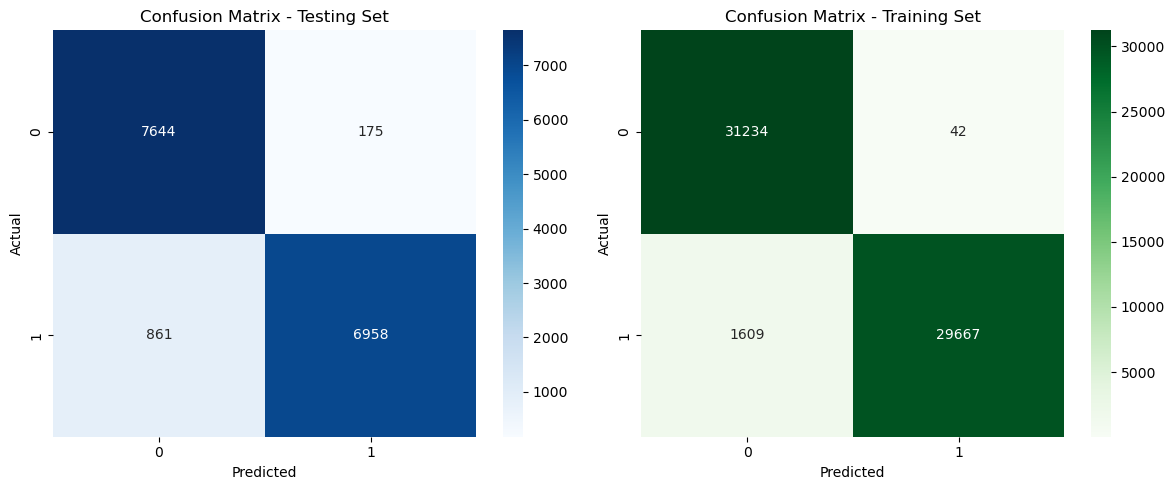

In [140]:
cm_test = confusion_matrix(y_test, y_pred_voting)
y_pred_voting_train = voting_clf.predict(x_train)
cm_train = confusion_matrix(y_train, y_pred_voting_train)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [189]:
import pickle

In [191]:
import joblib

In [190]:
pickle.dump(voting_clf,open("voting_model_personal_loan.pkl","wb"))

In [193]:
pickle.dump(scale, open('scaler_voting_model_personal_loan.pkl','wb'))